Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

For instance, when using the model to predict an investment outcome based on business data, and the client is the end-user of the model result, and that result leads to a investment action, interpretability is essential since it can be used to help with understanding why the action should be taken.
I prefer to use decision tree when I want the model to be simple and explainable and my client can easily accept its result. Meanwhile, in this case, I don't need to care about feature selection or regularization.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

The accuracy is more important than interpretability when the cost of having an error is heavy, for instance, when using a model to predict the rate of having certain disease based on hospital patient data, misdiagnose should be eliminated and accuracy should be added up to the model.
If I don't bother much about interpreting the model but want better accuracy and have an unexpected training or validation data set, I would choose random forestrather than decision tree.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

I learnt the method from Domingos's work, learn a single decision tree that best predicts the output of the forest. Preserves interpretability along with a substantial fraction of the gains in accuracy and stability.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import io
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

In [2]:
from StringIO import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


In [3]:
df['weight'].unique()

array(['light', 'medium', 'weighty'], dtype=object)

In [4]:
df['weight'].replace(['light','medium', 'weighty'],[1,2,3], inplace = True)
df

,MPG,cylinders,HP,weight
0,good,4,75,1
1,bad,6,90,2
2,bad,4,110,2
3,bad,8,175,3
4,bad,6,95,2
5,bad,4,94,1
6,bad,4,95,1
7,bad,8,139,3
8,bad,8,190,3
9,bad,8,145,3


In [5]:
X = df.iloc[:,1:]
y = df['MPG']
print(X.shape)
print(y.head())
X.head()

(20, 3)
0    good
1     bad
2     bad
3     bad
4     bad
Name: MPG, dtype: object


,cylinders,HP,weight
0,4,75,1
1,6,90,2
2,4,110,2
3,8,175,3
4,6,95,2


In [6]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("HW1_Feb") 

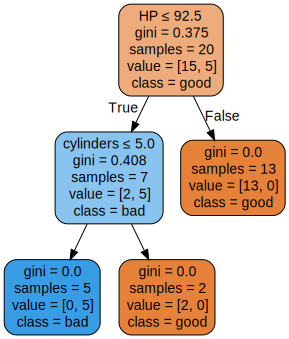

In [8]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=X.columns,  
                         class_names=y.values,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Fig1. Decidion Tree(good or bad car)

### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [9]:
# your code here
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df
value = df['MPG'].describe()
print('The most common MPG value is %s.'%value[2])

The most common MPG value is bad.


In [10]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

### binary questions and the information gain:

In [11]:
MPG4 = df[df['cylinders'] == 4]['MPG']
MPGn4 = df[df['cylinders'] != 4]['MPG']
MPG6 = df[df['cylinders'] == 6]['MPG']
MPGn6 = df[df['cylinders'] != 6]['MPG']
MPG8 = df[df['cylinders'] == 8]['MPG']
MPGn8 = df[df['cylinders'] != 8]['MPG']
MPGl = df[df['weight'] == 'light']['MPG']
MPGnl = df[df['weight'] != 'light']['MPG'] 
MPGm = df[df['weight'] == 'medium']['MPG']
MPGnm = df[df['weight'] != 'medium']['MPG']
MPGw = df[df['weight'] == 'weighty']['MPG']
MPGnw = df[df['weight'] != 'weighty']['MPG']

In [12]:
list1 = [sum(MPG4 == 'good'), sum(MPG4 == 'bad'),
sum(MPGn4 == 'good'), sum(MPGn4 == 'bad')]
list2 = [sum(MPG6 == 'good'), sum(MPG6 == 'bad'),
sum(MPGn6 == 'good'), sum(MPGn6 == 'bad')]
list3 = [sum(MPG8 == 'good'), sum(MPG8 == 'bad'),
sum(MPGn8 == 'good'), sum(MPGn8 == 'bad')]
list4 = [sum(MPGl == 'good'), sum(MPGl == 'bad'),
sum(MPGnl == 'good'), sum(MPGnl == 'bad')]
list5 = [sum(MPGm == 'good'), sum(MPGm == 'bad'),
sum(MPGnm == 'good'), sum(MPGnm == 'bad')]
list6 = [sum(MPGw == 'good'), sum(MPGw == 'bad'),
sum(MPGnw == 'good'), sum(MPGnw == 'bad')]

In [13]:
print ('1.Cylinders = 4? Group Y: numbers of good :%s, numbers of bad:%s; Group N: numbers of good :%s, numbers of bad:%s'
       %(list1[0], list1[1],list1[2], list1[3]))
print ('2.Cylinders = 6? Group Y: numbers of good :%s, numbers of bad:%s; Group N: numbers of good :%s, numbers of bad:%s'
       %(list2[0], list2[1],list2[2], list2[3]))
print ('3.Cylinders = 8? Group Y: numbers of good :%s, numbers of bad:%s; Group N: numbers of good :%s, numbers of bad:%s'
       %(list3[0], list3[1],list3[2], list3[3]))
print ('4.Weight = light? Group Y: numbers of good :%s, numbers of bad:%s; Group N: numbers of good :%s, numbers of bad:%s'
       %(list4[0], list4[1],list4[2], list4[3]))
print ('5.Weight = medium? Group Y: numbers of good :%s, numbers of bad:%s, Group N: numbers of good :%s, numbers of bad:%s'
       %(list5[0], list5[1],list5[2], list5[3]))
print ('6.Weight = weighty? Group Y: numbers of good :%s, numbers of bad:%s, Group N: numbers of good :%s, numbers of bad:%s'
       %(list6[0], list6[1],list6[2], list6[3]))

1.Cylinders = 4? Group Y: numbers of good :5, numbers of bad:4; Group N: numbers of good :0, numbers of bad:11
2.Cylinders = 6? Group Y: numbers of good :0, numbers of bad:6; Group N: numbers of good :5, numbers of bad:9
3.Cylinders = 8? Group Y: numbers of good :0, numbers of bad:5; Group N: numbers of good :5, numbers of bad:10
4.Weight = light? Group Y: numbers of good :3, numbers of bad:3; Group N: numbers of good :2, numbers of bad:12
5.Weight = medium? Group Y: numbers of good :2, numbers of bad:6, Group N: numbers of good :3, numbers of bad:9
6.Weight = weighty? Group Y: numbers of good :0, numbers of bad:6, Group N: numbers of good :5, numbers of bad:9


In [14]:
### compute the information gain：
print ('1.Cylinders = 4? information gain:%s'%InformationGain(list1[0], list1[1],list1[2], list1[3]))
print ('2.Cylinders = 6? information gain:%s'%InformationGain(list2[0], list2[1],list2[2], list2[3]))
print ('3.Cylinders = 8? information gain:%s'%InformationGain(list3[0], list3[1],list3[2], list3[3]))
print ('4.Weight = light? information gain:%s'%InformationGain(list4[0], list4[1],list4[2], list4[3]))
print ('5.Weight = medium? information gain:%s'%InformationGain(list5[0], list5[1],list5[2], list5[3]))
print ('6.Weight = weighty? information gain:%s'%InformationGain(list6[0], list6[1],list6[2], list6[3]))

1.Cylinders = 4? information gain:0.365293897532
2.Cylinders = 6? information gain:0.15307795339
3.Cylinders = 8? information gain:0.122556248918
4.Weight = light? information gain:0.0971071794515
5.Weight = medium? information gain:0.0
6.Weight = weighty? information gain:0.15307795339


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [15]:
# count midpoints
midpoints = []
for i in range(len(df['HP'].unique())-1):
    midpoints.append((df['HP'].unique()[i] + df['HP'].unique()[i+1]) / 2.)

* calculate midpoints 

In [16]:
num_good = len(df[df['MPG']=='good'])
num_bad = len(df[df['MPG']=='bad'])

* the information gain：

In [17]:
print('There are %d possible questions:'%(len(midpoints)))
for mid in midpoints:
    try:
        goodY = df[df['HP'] <= mid].groupby('MPG').size()['good']
    except KeyError:
        goodY = 0
    try:
        badY = df[df['HP'] <= mid].groupby('MPG').size()['bad']
    except KeyError:
        badY = 0
    goodN = num_good - goodY
    badN = num_bad - badY
    print('HP <= %f? the information gain is %.4f'%(
        mid, InformationGain(goodY, badY, goodN, badN)))

There are 16 possible questions:
HP <= 82.500000? the information gain is 0.3671
HP <= 100.000000? the information gain is 0.1531
HP <= 142.500000? the information gain is 0.0944
HP <= 135.000000? the information gain is 0.1226
HP <= 94.500000? the information gain is 0.3653
HP <= 116.500000? the information gain is 0.1226
HP <= 164.500000? the information gain is 0.0684
HP <= 167.500000? the information gain is 0.0684
HP <= 122.500000? the information gain is 0.1226
HP <= 96.000000? the information gain is 0.2234
HP <= 131.000000? the information gain is 0.1226
HP <= 129.500000? the information gain is 0.1226
HP <= 77.000000? the information gain is 0.2263
HP <= 75.000000? the information gain is 0.2263
HP <= 83.000000? the information gain is 0.3671
HP <= 87.000000? the information gain is 0.2142


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

* the optimal binary split is "HP <= 92.5?"
Based on this split, the "YES" group needs further partitioning.

In [18]:
goodY = df[df['HP'] <= 92.5].groupby('MPG').size()['good']
badY = df[df['HP'] <= 92.5].groupby('MPG').size()['bad']

print ('HP <= 92.5? Group Y: numbers of good :%s, numbers of bad:%s; Group N: numbers of good :%s, numbers of bad:%s'
       %(goodY, badY, num_good - goodY, num_bad - badY))

HP <= 92.5? Group Y: numbers of good :5, numbers of bad:2; Group N: numbers of good :0, numbers of bad:13


e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [19]:
# your code here

#Enumerate all the possible binary questions you could ask for each discrete-valued variable. 
#For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes,
#and compute the information gain using the provided function above. (5 pts)
newdf1 = df[df['HP'] <= 92.5]
newdf1

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light


In [20]:
MPGc4 = newdf1[newdf1['cylinders'] == 4]['MPG']
MPGcn4 = newdf1[newdf1['cylinders'] != 4]['MPG']
MPGc6 = newdf1[newdf1['cylinders'] == 6]['MPG']
MPGcn6 = newdf1[newdf1['cylinders'] != 6]['MPG']

MPGwl = newdf1[newdf1['weight'] == 'light']['MPG']
MPGwnl = newdf1[newdf1['weight'] != 'light']['MPG'] 
MPGwm = newdf1[newdf1['weight'] == 'medium']['MPG']
MPGwnm = newdf1[newdf1['weight'] != 'medium']['MPG']

In [21]:
list11 = [sum(MPGc4 == 'good'), sum(MPGc4 == 'bad'),
sum(MPGcn4 == 'good'), sum(MPGcn4 == 'bad')]
list12 = [sum(MPGc6 == 'good'), sum(MPGc6 == 'bad'),
sum(MPGcn6 == 'good'), sum(MPGcn6 == 'bad')]

list13 = [sum(MPGwl == 'good'), sum(MPGwl == 'bad'),
sum(MPGwnl == 'good'), sum(MPGwnl == 'bad')]
list14 = [sum(MPGwm == 'good'), sum(MPGwm == 'bad'),
sum(MPGwnm == 'good'), sum(MPGwnm == 'bad')]

* Information Gain

In [22]:
print ('1.Cylinders = 4? Group Y: numbers of good :%s, numbers of bad:%s; Group N: numbers of good :%s, numbers of bad:%s'
       %(list11[0], list11[1],list11[2], list11[3]))
print ('2.Cylinders = 6? Group Y: numbers of good :%s, numbers of bad:%s; Group N: numbers of good :%s, numbers of bad:%s'
       %(list12[0], list12[1],list12[2], list12[3]))

print ('3.weight = light? Group Y: numbers of good :%s, numbers of bad:%s; Group N: numbers of good :%s, numbers of bad:%s'
       %(list13[0], list13[1],list13[2], list13[3]))
print ('4.weight = medium? Group Y: numbers of good :%s, numbers of bad:%s; Group N: numbers of good :%s, numbers of bad:%s'
       %(list14[0], list14[1],list14[2], list14[3]))

1.Cylinders = 4? Group Y: numbers of good :5, numbers of bad:0; Group N: numbers of good :0, numbers of bad:2
2.Cylinders = 6? Group Y: numbers of good :0, numbers of bad:2; Group N: numbers of good :5, numbers of bad:0
3.weight = light? Group Y: numbers of good :3, numbers of bad:0; Group N: numbers of good :2, numbers of bad:2
4.weight = medium? Group Y: numbers of good :2, numbers of bad:2; Group N: numbers of good :3, numbers of bad:0


In [23]:
# count midpoints
midpoints1 = []
for i in range(len(newdf1['HP'].unique())-1):
    midpoints1.append((sorted(newdf1['HP'].unique())[i] + sorted(newdf1['HP'].unique())[i+1]) / 2.)

In [24]:
num_good = len(newdf1[newdf1['MPG']=='good'])
num_bad = len(newdf1[newdf1['MPG']=='bad'])

In [25]:
print('There are %d possible questions:'%(len(midpoints1)))
for mid in midpoints1:
    try:
        goodY = newdf1[newdf1['HP'] <= mid].groupby('MPG').size()['good']
    except KeyError:
        goodY = 0
    try:
        badY = newdf1[newdf1['HP'] <= mid].groupby('MPG').size()['bad']
    except KeyError:
        badY = 0
    goodN = num_good - goodY
    badN = num_bad - badY
    print('HP <= %f? the information gain is %.4f'%(
        mid, InformationGain(goodY, badY, goodN, badN)))

There are 6 possible questions:
HP <= 70.000000? the information gain is 0.0760
HP <= 78.000000? the information gain is 0.1696
HP <= 83.000000? the information gain is 0.2917
HP <= 87.000000? the information gain is 0.0060
HP <= 89.500000? the information gain is 0.0617
HP <= 91.000000? the information gain is 0.0760


In [26]:
print ('1.Cylinders = 4? information gain:%s'%InformationGain(list11[0], list11[1],list11[2], list11[3]))
print ('2.Cylinders = 6? information gain:%s'%InformationGain(list12[0], list12[1],list12[2], list12[3]))
print ('3.weight = light? information gain:%s'%InformationGain(list13[0], list13[1],list13[2], list13[3]))
print ('4.weight = medium? information gain:%s'%InformationGain(list14[0], list14[1],list14[2], list14[3]))

1.Cylinders = 4? information gain:0.863120568567
2.Cylinders = 6? information gain:0.863120568567
3.weight = light? information gain:0.291691997138
4.weight = medium? information gain:0.291691997138


Here we select the question based on the max information gain: Cylinders = 4?

In [27]:
newdf1[newdf1['cylinders'] == 4]

,MPG,cylinders,HP,weight
0,good,4,75,light
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
17,good,4,81,light


* no further split needed.

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

In [28]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

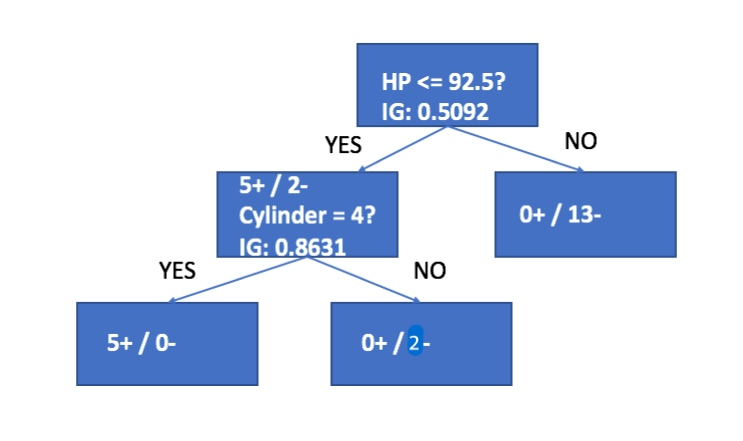

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light    ==>Bad

?,6,113,medium  ==>Bad

?,4,83,weighty  ==>Good

?,4,95,weighty  ==>Bad


### Question 3, Predicting burden of disease （40 pts)

In [30]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [31]:
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [33]:
data.shape

(130, 16)

In [34]:
data.BurdenOfDisease.replace(['low', 'medium', 'high','awful'],[1,2,3,4],inplace = True)

In [35]:
# X = np.matrix(data.iloc[:,1:15])
X = data.iloc[:,1:15]
y = data.BurdenOfDisease

In [36]:
print X.shape
print y.shape

(130, 14)
(130,)


In [37]:
from sklearn import linear_model
from sklearn import metrics, cross_validation

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=999)

In [39]:
AC = []
for i in range(2,10):    
    dt=tree.DecisionTreeClassifier(max_depth=i) #choose the maximum tree depth as hyper-parameter governing model simplicity
    dt.fit(X_train,y_train)
    AC.append(dt.score(X_test,y_test))
# in sample accuracy
    print 
    print 'max tree depth %d:\nIn sample accuracy:'%i,dt.score(X_train,y_train)
# out of sample accuracy
    print 'Out of sample accuracy:',dt.score(X_test,y_test)


max tree depth 2:
In sample accuracy: 0.703296703297
Out of sample accuracy: 0.615384615385

max tree depth 3:
In sample accuracy: 0.824175824176
Out of sample accuracy: 0.641025641026

max tree depth 4:
In sample accuracy: 0.901098901099
Out of sample accuracy: 0.692307692308

max tree depth 5:
In sample accuracy: 0.934065934066
Out of sample accuracy: 0.666666666667

max tree depth 6:
In sample accuracy: 0.956043956044
Out of sample accuracy: 0.666666666667

max tree depth 7:
In sample accuracy: 0.967032967033
Out of sample accuracy: 0.641025641026

max tree depth 8:
In sample accuracy: 0.989010989011
Out of sample accuracy: 0.666666666667

max tree depth 9:
In sample accuracy: 1.0
Out of sample accuracy: 0.615384615385


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

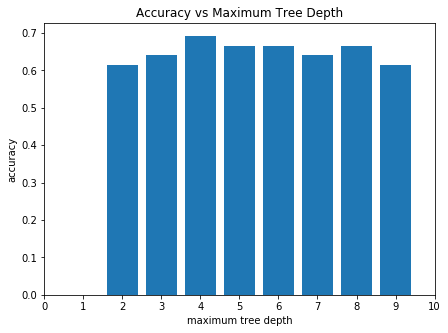

In [40]:
import matplotlib.pylab as plt
# your code here
plt.figure(figsize=(7,5))
plt.bar(range(2,10),AC)
plt.xlabel("maximum tree depth")
plt.ylabel("accuracy")
plt.title("Accuracy vs Maximum Tree Depth")
plt.xlim(0,10)
plt.xticks(np.arange(11))
plt.show()

### Fig1. Accuracy vs. Maximum Tree Depth

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [41]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=999)

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(2, 10)}
dt=DecisionTreeClassifier()
gs=GridSearchCV(dt,param_grid=param_grid)

rs=gs.fit(X_train,y_train)
print(rs.best_params_)

{'max_depth': 4}


In [43]:
print('The out of sample accuracy after tuning the hyper-parameter is %s'%(rs.score(X_test,y_test)))

The out of sample accuracy after tuning the hyper-parameter is 0.692307692308


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [44]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:

# your code here
thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print thestring

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S85') dtype('S85') dtype('S85')

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here
param_grid = {'n_estimators':(1,51,5)}
rf=RandomForestClassifier(n_jobs=-1,max_depth=5)
gs=GridSearchCV(rf,param_grid=param_grid)
rs=gs.fit(X_train,y_train)

In [50]:
rs.best_params_

{'n_estimators': 51}

In [51]:
rs.score(X_test,y_test)

0.74358974358974361

* The out of sample accuracy is higher than we got in 3)c which is 0.666666666667.

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

The random forest classifier can give us a higher accuracy than decision tree classifier, but it is more difficult to interpret the random forest classifier since we can easily visualize the result of decision tree classifier and need further calculation of feature importance to interpret the random forest classifier.